# Instagram Account Analyis
### Intern Name: Kirti

In [1]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing file
df=pd.read_csv("data.csv")

In [3]:
## read file
df.head()

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.10%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.40%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.70%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.70%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.10%


In [4]:
## show number of rows and columns
df.shape

(200, 8)

In [5]:
## show columns name 
df.columns

Index(['rank', 'name', 'channel_Info', 'Category', 'Posts', 'Followers',
       'Avg. Likes', 'Eng Rate'],
      dtype='object')

In [6]:
## to check there is any null value or not
df.isnull().sum()

rank            0
name            0
channel_Info    5
Category        7
Posts           0
Followers       0
Avg. Likes      0
Eng Rate        0
dtype: int64

In [7]:
## drop null value
df.dropna(inplace=True)

In [8]:
## after droping null value
df.isnull().sum()

rank            0
name            0
channel_Info    0
Category        0
Posts           0
Followers       0
Avg. Likes      0
Eng Rate        0
dtype: int64

In [9]:
df.shape

(190, 8)

In [10]:
df.describe()

,rank
count,190.000000
mean,100.878947
std,57.502345
min,1.000000
25%,52.250000
50%,99.500000
75%,149.750000
max,200.000000


## Exploratory Data Analysis

### Category Distribution

In [11]:
category=df.groupby(["Category"],as_index=False)["name"].count().sort_values(by="name", ascending=False)
category

,Category,name
5,entertainment,128
2,"Health, Sports & Fitness",39
6,fashion,9
0,Beauty & Makeup,3
4,News & Politics,3
7,food,2
8,photography,2
9,technology,2
1,Craft/DIY,1
3,Lifestyle,1


Text(0, 0.5, 'count')

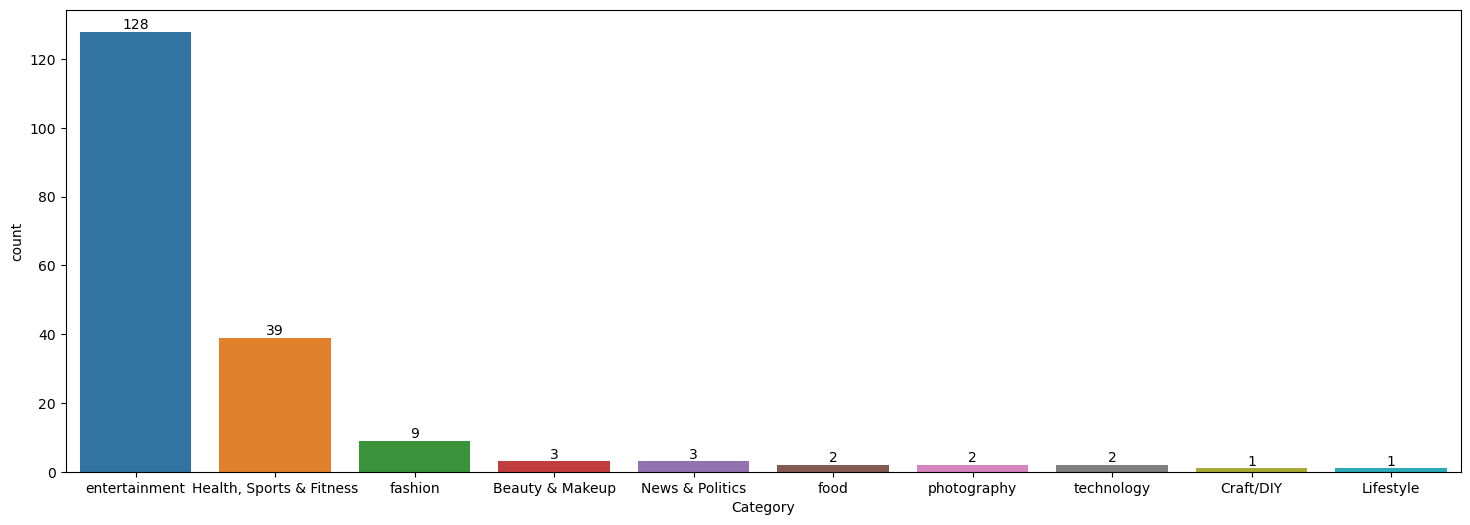

In [12]:
plt.figure(figsize=(18,6))
ax=sns.barplot(data=category, x="Category", y="name")
for bar in ax.containers:
    ax.bar_label(bar)
plt.ylabel("count")

from the above graph we conclude that 
ENTERTAINMET is the HIGHEST category on instagram 

### Top Account by followers

In [13]:
# Convert Followers and Avg. Likes columns to numeric values for analysis
df['Followers'] = df['Followers'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
df['Avg. Likes'] = df['Avg. Likes'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

# Top 10 accounts by followers
top_followers = df.nlargest(10, 'Followers')
top_followers[['rank', 'name', 'Followers']]

,rank,name,Followers
0,1,instagram,580100000.0
1,2,cristiano,519900000.0
2,3,leomessi,403700000.0
3,4,kyliejenner,375900000.0
4,5,selenagomez,365300000.0
5,6,therock,354300000.0
6,7,arianagrande,345600000.0
7,8,kimkardashian,336300000.0
8,9,beyonce,287300000.0
9,10,khloekardashian,283900000.0


Text(0.5, 1.0, 'Top Followers')

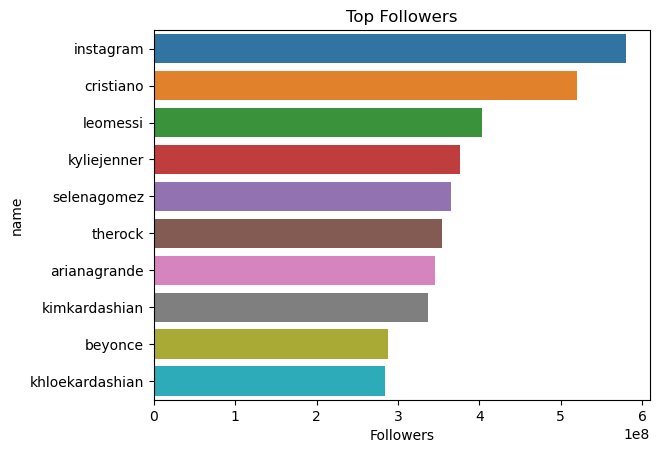

In [14]:
ax=sns.barplot(data=top_followers, x="Followers", y="name")
ax.set_title("Top Followers")

INSTAGRAM Account has the HIGHEST number of FOLLOWERS

### Engagement Rate Analysis

In [15]:
# Convert Eng Rate to numeric values
df['Eng Rate'] = df['Eng Rate'].str.replace('%', '').astype(float) / 100

# Top 10 accounts by engagement rate
top_engagement = df.nlargest(10, 'Eng Rate')
top_engagement[['rank', 'name', 'Eng Rate']]

,rank,name,Eng Rate
129,130,j.m,0.266
99,100,thv,0.239
164,165,rkive,0.153
165,166,mahi7781,0.109
61,62,tomholland2013,0.099
138,139,badbunnypr,0.097
54,55,jennierubyjane,0.087
121,122,harrystyles,0.085
67,68,roses_are_rosie,0.083
125,126,zayn,0.083


Text(0.5, 1.0, 'Top Engagement Rate ')

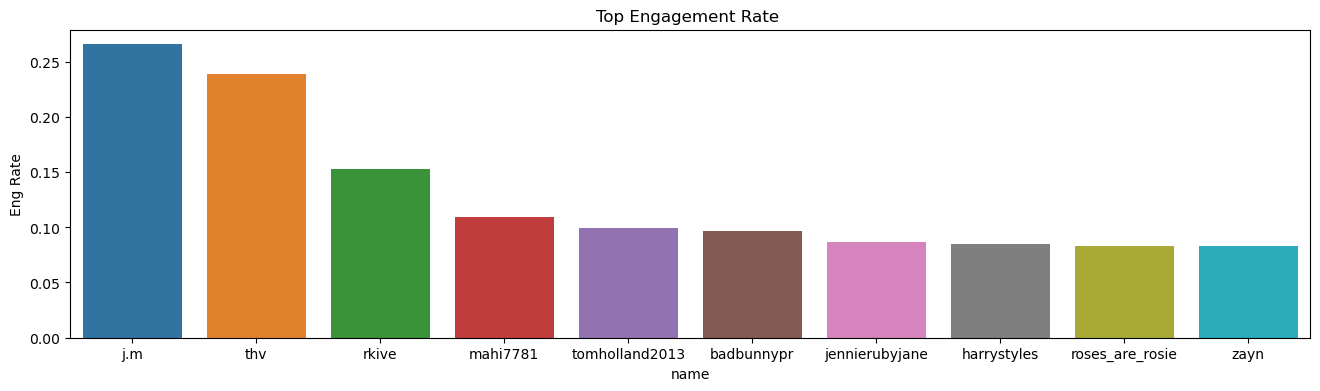

In [16]:
plt.figure(figsize=(16,4))
ax=sns.barplot(data=top_engagement, x="name", y="Eng Rate")
ax.set_title("Top Engagement Rate ")

In [17]:
top_engagement[['rank', 'Category', 'Eng Rate']]

,rank,Category,Eng Rate
129,130,entertainment,0.266
99,100,entertainment,0.239
164,165,entertainment,0.153
165,166,"Health, Sports & Fitness",0.109
61,62,entertainment,0.099
138,139,entertainment,0.097
54,55,entertainment,0.087
121,122,entertainment,0.085
67,68,entertainment,0.083
125,126,entertainment,0.083


JM account has the HIGHEST engagement rates.

### Correlation between Posts and Followers

In [18]:
# Convert Posts to numeric values
df['Posts'] = df['Posts'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

# Correlation between posts and followers
correlation_posts_followers = df[['Posts', 'Followers']].corr()
correlation_posts_followers

,Posts,Followers
Posts,1.000000,-0.027974
Followers,-0.027974,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

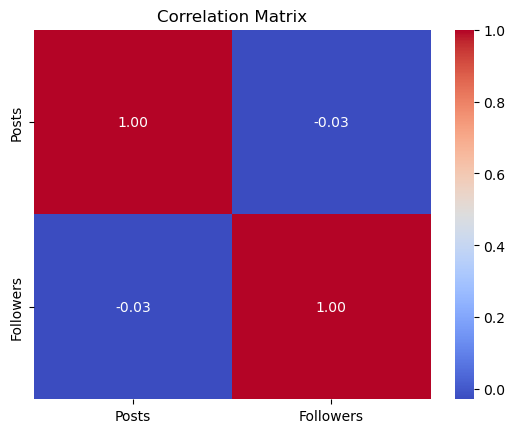

In [19]:
sns.heatmap(data=correlation_posts_followers, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

In [22]:
correlation_avg_followers = df[['Avg. Likes', 'Followers']].corr()
correlation_avg_followers

,Avg. Likes,Followers
Avg. Likes,1.000000,-0.028212
Followers,-0.028212,1.000000


The correlation between the number of posts and the number of followers is -0.02 indicating a very weak and negative correlation. 

### Average Likes vs. Followers

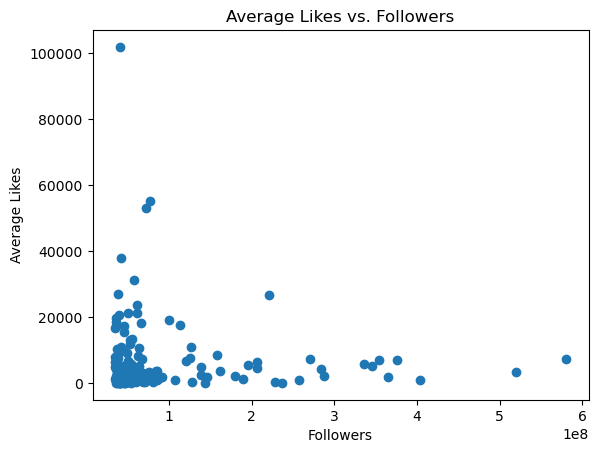

In [20]:
plt.scatter(df['Followers'], df['Avg. Likes'])
plt.xlabel('Followers')
plt.ylabel('Average Likes')
plt.title('Average Likes vs. Followers')
plt.show()

As shown in the plot, there is a wide range of average likes for accounts with varying numbers of followers, suggesting that follower count does not necessarily predict the average likes an account will receive.